<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-capeju/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n_A01793931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Maestría en Inteligencia Artificial Aplicada
* Curso: Actividad semana 6
* Tecnológico de Monterrey
* Carlos Jesús Peñaloza Julio -- A01793931
* María de la Paz Rico Fernández
* Noviembre 1 de 2022

In [158]:
# import de las librerias 
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

**Conjunto de datos**

In [59]:
#Se escoge el dataset de acuerdo a las instrucciones de la actividad

url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [60]:
# Importación de los datos con encabezados

datos = pd.read_csv(url, index_col=0) 
datos.index.name = None #Sustituyo el nombre de ID por un valor Nulo
datos

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [61]:
#Creando encabezados y renombramos las columnas de acuerdo con el Data Set Information

headers = ['monto_crédito','género','nivel_educativo','estado_civil','edad','pago-sep2005','pago-ago2005','pago-jul2005',
           'pago-jun2005','pago-may2005','pago-abr2005','amortización-sep2005','amortización-ago2005','amortización-jul2005',
          'amortización-jun2005','amortización-may2005','amortización-abr2005','pago-prev-sep2005','pago-prev-ago2005',
          'pago-prev-jul2005','pago-prev-jun2005','pago-prev-may2005','pago-prev-abr2005','Y']

datos.columns = headers #Cambiar nombre de columnas por el encabezado creado
datos.head()

,monto_crédito,género,nivel_educativo,estado_civil,edad,pago-sep2005,pago-ago2005,pago-jul2005,pago-jun2005,pago-may2005,pago-abr2005,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Información de Dataframe**

In [62]:
#shape
print('Shape:', datos.shape)    #Conocer las dimensiones del conjunto de datos
#columns
print('Columns:',datos.columns) #Vemos los encabezados de cada columna
#dtypes
print('Dtypes:',datos.dtypes)   #Se imprime tipo de datos

Shape: (30000, 24)
Columns: Index(['monto_crédito', 'género', 'nivel_educativo', 'estado_civil', 'edad',
       'pago-sep2005', 'pago-ago2005', 'pago-jul2005', 'pago-jun2005',
       'pago-may2005', 'pago-abr2005', 'amortización-sep2005',
       'amortización-ago2005', 'amortización-jul2005', 'amortización-jun2005',
       'amortización-may2005', 'amortización-abr2005', 'pago-prev-sep2005',
       'pago-prev-ago2005', 'pago-prev-jul2005', 'pago-prev-jun2005',
       'pago-prev-may2005', 'pago-prev-abr2005', 'Y'],
      dtype='object')
Dtypes: monto_crédito             int64
género                  float64
nivel_educativo         float64
estado_civil            float64
edad                    float64
pago-sep2005            float64
pago-ago2005            float64
pago-jul2005            float64
pago-jun2005            float64
pago-may2005            float64
pago-abr2005            float64
amortización-sep2005    float64
amortización-ago2005    float64
amortización-jul2005    float64
amo

In [63]:
#Conocer los tipos de datos e información detallada del dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   monto_crédito         30000 non-null  int64  
 1   género                29999 non-null  float64
 2   nivel_educativo       29998 non-null  float64
 3   estado_civil          29998 non-null  float64
 4   edad                  29995 non-null  float64
 5   pago-sep2005          29997 non-null  float64
 6   pago-ago2005          29995 non-null  float64
 7   pago-jul2005          29993 non-null  float64
 8   pago-jun2005          29991 non-null  float64
 9   pago-may2005          29984 non-null  float64
 10  pago-abr2005          29986 non-null  float64
 11  amortización-sep2005  29989 non-null  float64
 12  amortización-ago2005  29989 non-null  float64
 13  amortización-jul2005  29987 non-null  float64
 14  amortización-jun2005  29985 non-null  float64
 15  amortización-may200

In [64]:
datos.isna().sum().sort_values(ascending=False)

amortización-may2005    17
pago-may2005            16
amortización-jun2005    15
pago-abr2005            14
amortización-jul2005    13
amortización-sep2005    11
amortización-ago2005    11
pago-prev-jun2005       11
pago-prev-may2005       11
amortización-abr2005    10
pago-jun2005             9
pago-prev-ago2005        9
pago-prev-jul2005        8
pago-prev-sep2005        8
pago-jul2005             7
pago-ago2005             5
edad                     5
pago-prev-abr2005        5
Y                        3
pago-sep2005             3
estado_civil             2
nivel_educativo          2
género                   1
monto_crédito            0
dtype: int64

**Registros nulos**

In [65]:
#Total de registros vs registros nulos 
print('Total de registros: ' + str(datos.shape[0]) +
      '\nTotal de registros nulos: ' + str(datos.isna().sum().sum()))
#Porcentaje de registros nulos
#Porcentaje de registros nulos
print('Los registros nulos son el ' + str(round(datos.isna().sum().sum()/datos.shape[0] * 100,2)) + '% del total de los registros')

Total de registros: 30000
Total de registros nulos: 196
Los registros nulos son el 0.65% del total de los registros


In [66]:
pd.set_option('display.max_columns', None)

In [67]:
reg_nul = datos[datos.isnull().any(axis=1)].shape[0]

In [68]:
print('Total de registros: ' + str(datos.shape[0]) +
      '\nTotal de registros nulos: ' + str(reg_nul))
#Porcentaje de registros nulos
print('Los registros nulos son el ' + str(round(reg_nul/datos.shape[0] * 100,2)) + '% del total de los registros')

Total de registros: 30000
Total de registros nulos: 42
Los registros nulos son el 0.14% del total de los registros


In [111]:
datos_imputados = datos.copy()
datos_sin_nan = datos.copy()

In [112]:
datos_sin_nan.head()

,monto_crédito,género,nivel_educativo,estado_civil,edad,pago-sep2005,pago-ago2005,pago-jul2005,pago-jun2005,pago-may2005,pago-abr2005,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [113]:
datos_sin_nan.dropna(inplace=True) #Eliminando los registros que tengan valores nulos

In [114]:
datos_sin_nan.shape

(29958, 24)

In [115]:
datos.isnull().any()

monto_crédito           False
género                   True
nivel_educativo          True
estado_civil             True
edad                     True
pago-sep2005             True
pago-ago2005             True
pago-jul2005             True
pago-jun2005             True
pago-may2005             True
pago-abr2005             True
amortización-sep2005     True
amortización-ago2005     True
amortización-jul2005     True
amortización-jun2005     True
amortización-may2005     True
amortización-abr2005     True
pago-prev-sep2005        True
pago-prev-ago2005        True
pago-prev-jul2005        True
pago-prev-jun2005        True
pago-prev-may2005        True
pago-prev-abr2005        True
Y                        True
dtype: bool

In [74]:
datos.isnull().values.any()

True

In [116]:
datos.dropna()

,monto_crédito,género,nivel_educativo,estado_civil,edad,pago-sep2005,pago-ago2005,pago-jul2005,pago-jun2005,pago-may2005,pago-abr2005,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**Imputación de datos categóricos y numéricos**

In [108]:
datos_cat = list(datos.iloc[:,1:11])
datos_cat.remove('edad')
datos_cat

['género',
 'nivel_educativo',
 'estado_civil',
 'pago-sep2005',
 'pago-ago2005',
 'pago-jul2005',
 'pago-jun2005',
 'pago-may2005',
 'pago-abr2005']

**Estadística descriptiva**

In [119]:
#Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

datos.describe().T

,count,mean,std,min,25%,50%,75%,max
monto_crédito,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
género,29999.0,1.603753,0.489125,1.0,1.00,2.0,2.00,2.0
nivel_educativo,29998.0,1.853057,0.790320,0.0,1.00,2.0,2.00,6.0
estado_civil,29998.0,1.551903,0.521968,0.0,1.00,2.0,2.00,3.0
edad,29995.0,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
pago-sep2005,29997.0,-0.016635,1.123829,-2.0,-1.00,0.0,0.00,8.0
pago-ago2005,29995.0,-0.133689,1.197254,-2.0,-1.00,0.0,0.00,8.0
pago-jul2005,29993.0,-0.166405,1.196048,-2.0,-1.00,0.0,0.00,8.0
pago-jun2005,29991.0,-0.220800,1.169153,-2.0,-1.00,0.0,0.00,8.0
pago-may2005,29984.0,-0.266342,1.133296,-2.0,-1.00,0.0,0.00,8.0


In [80]:
datos_sin_nan.describe().T


,count,mean,std,min,25%,50%,75%,max
monto_crédito,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
género,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
nivel_educativo,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
estado_civil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
pago-sep2005,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
pago-ago2005,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
pago-jul2005,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
pago-jun2005,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
pago-may2005,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


In [81]:
#La estadística descriptiva de las variables númericas sería:

datos.select_dtypes(include=['float64', 'int']).describe().T

,count,mean,std,min,25%,50%,75%,max
monto_crédito,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
género,29999.0,1.603753,0.489125,1.0,1.00,2.0,2.00,2.0
nivel_educativo,29998.0,1.853057,0.790320,0.0,1.00,2.0,2.00,6.0
estado_civil,29998.0,1.551903,0.521968,0.0,1.00,2.0,2.00,3.0
edad,29995.0,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
pago-sep2005,29997.0,-0.016635,1.123829,-2.0,-1.00,0.0,0.00,8.0
pago-ago2005,29995.0,-0.133689,1.197254,-2.0,-1.00,0.0,0.00,8.0
pago-jul2005,29993.0,-0.166405,1.196048,-2.0,-1.00,0.0,0.00,8.0
pago-jun2005,29991.0,-0.220800,1.169153,-2.0,-1.00,0.0,0.00,8.0
pago-may2005,29984.0,-0.266342,1.133296,-2.0,-1.00,0.0,0.00,8.0


*La estadística descriptiva ayudó en el análisis del comportamiento de las variables tanto categóricas como numéricas, el estado civil, el género o el nivel educatívo muestran valores numéricos. Sin embargo, son variables categóricas porque no podrías indicar un nivel de estudios en un número decimal, en ese caso los percentiles soportan el concepto.*

*Para el monto de crédito, se apreció una desviación estándar en el orden de los 129.000, con un mínimo de 10.000 y 1.000.000. Los pagos previos por su parte muestran un mínimo de 0 y tiene mucho sentido porque en ese valor debe arrancar el crédito.*




**Conteo de variables y escalamiento**

In [125]:
#Según la descripción de las variables en el Data Set Information, las variables categóricas son:
#'género','nivel-educativo','estado_civil','pago-sep2005','pago-ago2005','pago-jul2005','pago-jun2005','pago-may2005','pago-abr2005','Y'

datos_cat = list(datos.iloc[:,1:11])
datos_cat.remove('edad')
datos_cat

['género',
 'nivel_educativo',
 'estado_civil',
 'pago-sep2005',
 'pago-ago2005',
 'pago-jul2005',
 'pago-jun2005',
 'pago-may2005',
 'pago-abr2005']

In [127]:
datos_num = datos.drop(['género','nivel_educativo','estado_civil','pago-sep2005','pago-ago2005','pago-jul2005','pago-jun2005','pago-may2005','pago-abr2005','Y'], axis = 1)
datos_num

,monto_crédito,edad,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [128]:
#Buscamos la varianza total de todas las variables númericas
t = datos.var().sum()
#Calculamos la varianza para cada variable que estamos estudiando

var_mon= datos["monto_crédito"].var()
var_edad= datos["edad"].var()
var_asep05= datos["amortización-sep2005"].var()
var_aago05= datos["amortización-ago2005"].var()
var_ajul05= datos["amortización-jul2005"].var()
var_ajun05= datos["amortización-jun2005"].var()
var_amay05= datos["amortización-may2005"].var()
var_aabr05= datos["amortización-abr2005"].var()
var_ppsep05= datos["pago-prev-sep2005"].var()
var_ppago05= datos["pago-prev-ago2005"].var()
var_ppjul05= datos["pago-prev-jul2005"].var()
var_ppjun05= datos["pago-prev-jun2005"].var()
var_ppmay05= datos["pago-prev-may2005"].var()
var_ppabr05= datos["pago-prev-abr2005"].var()

#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t\t:',t.round(2) )
print('Varianza monto-crédito \t:', ((var_mon/t)*100).round(2),'%' )
print('Varianza edad \t:', ((var_edad/t)*100).round(2),'%' )
print('Varianza amortización-sep2005 \t:', ((var_asep05/t)*100).round(2),'%' )
print('Varianza amortización-ago2005 \t:', ((var_aago05/t)*100).round(2),'%' )
print('Varianza amortización-jul2005 \t:', ((var_ajul05/t)*100).round(2),'%' )
print('Varianza amortización-jun2005 \t:', ((var_ajun05/t)*100).round(2),'%' )
print('Varianza amortización-may2005 \t:', ((var_amay05/t)*100).round(2),'%' )
print('Varianza amortización-abr2005 \t:', ((var_aabr05/t)*100).round(2),'%' )
print('Varianza pago-prev-sep2005 \t:', ((var_ppsep05/t)*100).round(2),'%' )
print('Varianza pago-prev-ago2005 \t:', ((var_ppago05/t)*100).round(2),'%' )
print('Varianza pago-prev-jul2005 \t:', ((var_ppjul05/t)*100).round(2),'%' )
print('Varianza pago-prev-jun2005 \t:', ((var_ppjun05/t)*100).round(2),'%' )
print('Varianza pago-prev-may2005 \t:', ((var_ppmay05/t)*100).round(2),'%' )
print('Varianza pago-prev-abr2005 \t:', ((var_ppabr05/t)*100).round(2),'%' )

Varianza Total 		: 45432389013.55
Varianza monto-crédito 	: 37.05 %
Varianza edad 	: 0.0 %
Varianza amortización-sep2005 	: 11.94 %
Varianza amortización-ago2005 	: 11.15 %
Varianza amortización-jul2005 	: 10.59 %
Varianza amortización-jun2005 	: 9.11 %
Varianza amortización-may2005 	: 8.14 %
Varianza amortización-abr2005 	: 7.81 %
Varianza pago-prev-sep2005 	: 0.6 %
Varianza pago-prev-ago2005 	: 1.17 %
Varianza pago-prev-jul2005 	: 0.68 %
Varianza pago-prev-jun2005 	: 0.54 %
Varianza pago-prev-may2005 	: 0.51 %
Varianza pago-prev-abr2005 	: 0.7 %


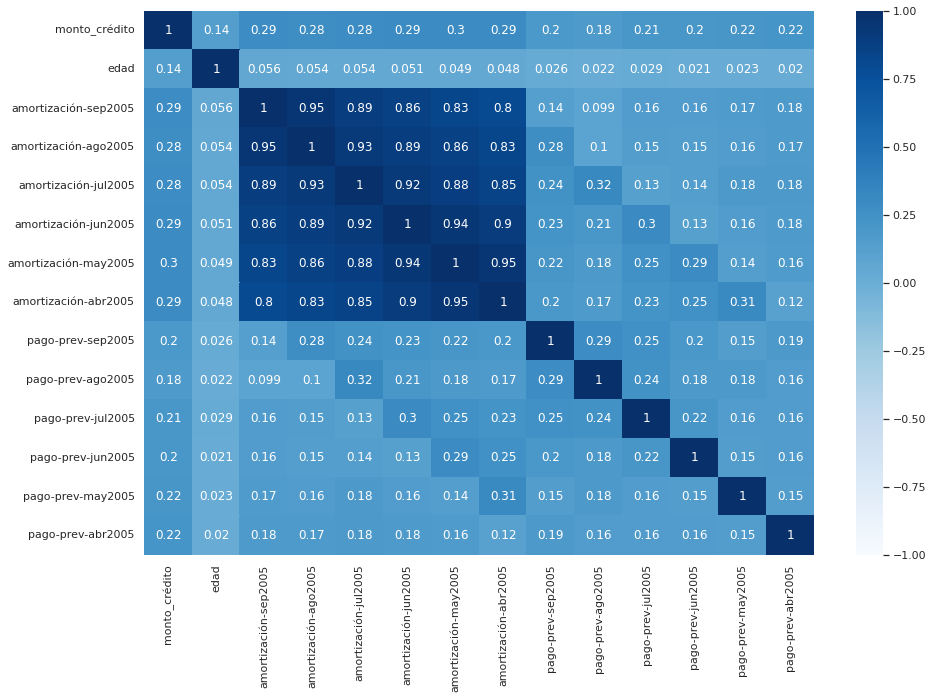

In [129]:
#Revisaremos la correlación entre las variables numéricas

datos_num.corr()

import seaborn as sns
correlacion = datos_num.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "Blues", annot= True)

Cuando existe un alto grado de correlación entre las variables que provoca que la información de los datos sea muy repetitiva. Se usa con frecuencia en análisis de datos exploratorios porque revela la estructura interna de los datos y explica la variación en los mismos (Microsoft, 2022). En este sentido la variable amortización en los diferentes periodos están altamente relacionadas por lo que serían candidatas a no ser consideradas en el PCA. Miraremos entonces el escalamiento de las variables antes de proceder con la reducción de dimensionalidad.

**Referencias bibliográficas: **

Componente Detección de anomalías basada en PCA. Recuperado de: Detección de anomalías basada en PCA: referencia de componente - Azure Machine Learning | Microsoft Learn

**Escala los datos, si consideras necesario**

In [130]:
scaler = StandardScaler()
scaled = scaler.fit_transform(datos_num)

scaled[:5]

array([[-1.13672015, -1.24586411, -0.64260318, -0.64747557, -0.66805862,
        -0.67256256, -0.66313396, -0.65280267, -0.34188504, -0.22711057,
        -0.29677335, -0.30808663, -0.3141435 , -0.29340185],
       [-0.3659805 , -1.02889425, -0.65931873, -0.6668203 , -0.63932436,
        -0.62171122, -0.60631669, -0.59805145, -0.34188504, -0.21361453,
        -0.2399814 , -0.24426427, -0.3141435 , -0.18090675],
       [-0.59720239, -0.16101485, -0.29870547, -0.49399619, -0.4825042 ,
        -0.4498393 , -0.41731497, -0.3917396 , -0.2502399 , -0.19191671,
        -0.2399814 , -0.24426427, -0.24870099, -0.01216409],
       [-0.90549825,  0.16443993, -0.05766747, -0.01345469,  0.03266522,
        -0.23252445, -0.18690489, -0.15671735, -0.22114045, -0.16939438,
        -0.22862301, -0.23788204, -0.24418546, -0.2371543 ],
       [-0.90549825,  2.33413844, -0.57872831, -0.61139914, -0.16133791,
        -0.34712645, -0.34827911, -0.33159889, -0.22114045,  1.33478509,
         0.27114616,  0.26

In [131]:
#Información escalar
scaled_datos_num = pd.DataFrame(scaled, columns=datos_num.columns)
scaled_datos_num.head()

,monto_crédito,edad,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005
0,-1.136720,-1.245864,-0.642603,-0.647476,-0.668059,-0.672563,-0.663134,-0.652803,-0.341885,-0.227111,-0.296773,-0.308087,-0.314144,-0.293402
1,-0.365981,-1.028894,-0.659319,-0.666820,-0.639324,-0.621711,-0.606317,-0.598051,-0.341885,-0.213615,-0.239981,-0.244264,-0.314144,-0.180907
2,-0.597202,-0.161015,-0.298705,-0.493996,-0.482504,-0.449839,-0.417315,-0.391740,-0.250240,-0.191917,-0.239981,-0.244264,-0.248701,-0.012164
3,-0.905498,0.164440,-0.057667,-0.013455,0.032665,-0.232524,-0.186905,-0.156717,-0.221140,-0.169394,-0.228623,-0.237882,-0.244185,-0.237154
4,-0.905498,2.334138,-0.578728,-0.611399,-0.161338,-0.347126,-0.348279,-0.331599,-0.221140,1.334785,0.271146,0.266315,-0.269054,-0.255210


In [133]:
cols = ["monto_crédito",           
        "edad",
        "amortización-sep2005",
        "amortización-ago2005",
        "amortización-jul2005",
        "amortización-jun2005",
        "amortización-may2005",
        "amortización-abr2005",
        "pago-prev-sep2005",
        "pago-prev-ago2005",
        "pago-prev-jul2005",
        "pago-prev-jun2005",
        "pago-prev-may2005",
        "pago-prev-abr2005"
        ]
summary = {
"Varianzas": scaled_datos_num[cols].var()[0:3],
"Valor Min": scaled_datos_num[cols].min()[0:3],
"Valor Max": scaled_datos_num[cols].max()[0:3]
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = cols).transpose()

,monto_crédito,edad,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005
Varianzas,1.000033,1.000033,1.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Min,-1.213794,-1.571319,-2.944122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Max,6.416528,4.720807,12.401204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**PCA**

In [134]:
scaled_datos_num.dropna()

,monto_crédito,edad,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005
0,-1.136720,-1.245864,-0.642603,-0.647476,-0.668059,-0.672563,-0.663134,-0.652803,-0.341885,-0.227111,-0.296773,-0.308087,-0.314144,-0.293402
1,-0.365981,-1.028894,-0.659319,-0.666820,-0.639324,-0.621711,-0.606317,-0.598051,-0.341885,-0.213615,-0.239981,-0.244264,-0.314144,-0.180907
2,-0.597202,-0.161015,-0.298705,-0.493996,-0.482504,-0.449839,-0.417315,-0.391740,-0.250240,-0.191917,-0.239981,-0.244264,-0.248701,-0.012164
3,-0.905498,0.164440,-0.057667,-0.013455,0.032665,-0.232524,-0.186905,-0.156717,-0.221140,-0.169394,-0.228623,-0.237882,-0.244185,-0.237154
4,-0.905498,2.334138,-0.578728,-0.611399,-0.161338,-0.347126,-0.348279,-0.331599,-0.221140,1.334785,0.271146,0.266315,-0.269054,-0.255210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381410,1.869958,2.017699,2.326129,0.695139,-0.149443,-0.384503,0.171279,0.610903,-0.012643,-0.113620,0.013069,-0.237154
29996,-0.134759,0.815349,-0.672884,-0.665373,-0.627502,-0.533017,-0.577785,-0.652803,-0.230981,-0.103997,0.214241,-0.299854,-0.314144,-0.293402
29997,-1.059646,0.164440,-0.647329,-0.643907,-0.638229,-0.348090,-0.324664,-0.327804,-0.341885,-0.257010,0.952650,-0.040033,-0.183258,-0.119034
29998,-0.674276,0.598380,-0.718074,0.410050,0.422128,0.147617,-0.468179,0.168952,4.844095,-0.109074,-0.229872,-0.185165,3.151954,-0.191931


In [135]:
# Validar datos any y null

np.isnan(scaled_datos_num)

,monto_crédito,edad,amortización-sep2005,amortización-ago2005,amortización-jul2005,amortización-jun2005,amortización-may2005,amortización-abr2005,pago-prev-sep2005,pago-prev-ago2005,pago-prev-jul2005,pago-prev-jun2005,pago-prev-may2005,pago-prev-abr2005
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
# Validar datos any y null
scaled_datos_num.isnull().values.any()

True

In [139]:
# # eliminar datos any y null
scaled_datos_num = scaled_datos_num.dropna()

In [140]:
scaled_datos_num.isnull().sum().sum()

0

In [141]:
scaled_datos_num.isnull().any()

monto_crédito           False
edad                    False
amortización-sep2005    False
amortización-ago2005    False
amortización-jul2005    False
amortización-jun2005    False
amortización-may2005    False
amortización-abr2005    False
pago-prev-sep2005       False
pago-prev-ago2005       False
pago-prev-jul2005       False
pago-prev-jun2005       False
pago-prev-may2005       False
pago-prev-abr2005       False
dtype: bool

In [142]:
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_datos_num)
pcs_t[:5]

array([[-1.95909668e+00, -5.36508897e-01,  1.32933379e+00,
        -1.79793900e-01,  1.81755925e-02,  2.42342769e-03,
         1.33599054e-02,  5.75059317e-02,  2.20853168e-01,
         2.02847279e-02,  1.69456554e-02, -3.17197358e-03,
         8.18288993e-03,  9.87824698e-03],
       [-1.73598732e+00, -2.17139216e-01,  8.62508222e-01,
        -2.82876270e-01,  4.92276382e-02, -1.17600834e-01,
         9.89708558e-02,  7.57210712e-02, -2.87579987e-01,
        -7.30141886e-02, -5.52748463e-03,  1.22495424e-02,
        -4.04139169e-03,  7.53082222e-04],
       [-1.22493502e+00, -2.84817781e-01,  2.12891381e-01,
        -8.83803296e-03,  1.27312003e-01, -6.23047263e-02,
        -1.36550817e-02,  8.35149807e-02,  2.82824680e-01,
        -1.60383606e-02,  1.12485547e-01, -8.04973941e-02,
        -4.13763002e-02, -5.71156874e-02],
       [-5.41670911e-01, -6.66448507e-01,  9.85083191e-02,
         2.91908035e-01,  9.71097081e-03,  1.08300489e-01,
        -1.33642259e-01,  6.20360023e-02,  5.

In [143]:
pcsSummary_scaled_datos_num = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_scaled_datos_num

,% varianza explicada,% varianza acumulada
0,42.28,42.280489
1,12.26,54.537878
2,7.46,61.996063
3,6.61,68.603715
4,6.31,74.917728
5,6.23,81.152632
6,5.57,86.722696
7,5.19,91.913022
8,5.05,96.963361
9,1.89,98.852476


In [144]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_datos_num.columns))]
pcsSummary_scaled_datos_num.index = pcs_labels
pcsSummary_scaled_datos_num

,% varianza explicada,% varianza acumulada
PC1,42.28,42.280489
PC2,12.26,54.537878
PC3,7.46,61.996063
PC4,6.61,68.603715
PC5,6.31,74.917728
PC6,6.23,81.152632
PC7,5.57,86.722696
PC8,5.19,91.913022
PC9,5.05,96.963361
PC10,1.89,98.852476


In [146]:
#Creamos un dataframe con los valores de cada componente. Cada valor del␣componente se le conoce como "Peso"
#Recuerda que defimos pcs_t y pcs_labels más arriba
pcs_scaled_datos_num = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_datos_num.var().sum())
print("Varianza total de los componentes: ", pcs_scaled_datos_num.var().sum())

Varianza total variables originales:  14.004713268509487
Varianza total de los componentes:  14.00471326850951


In [147]:
total_var =scaled_datos_num.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_datos_num.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_datos_num.var().cumsum() / total_var) * 100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
monto_crédito,7.139061,7.139061
edad,7.135590,14.274651
amortización-sep2005,7.144096,21.418747
amortización-ago2005,7.143960,28.562707
amortización-jul2005,7.143400,35.706106
amortización-jun2005,7.142839,42.848945
amortización-may2005,7.142547,49.991493
amortización-abr2005,7.144153,57.135645
pago-prev-sep2005,7.141811,64.277456
pago-prev-ago2005,7.144998,71.422453


In [149]:
scaled_datos_num.select_dtypes(include=['float64', 'int']).describe().T

,count,mean,std,min,25%,50%,75%,max
monto_crédito,29971.0,0.000321,0.999902,-1.213794,-0.905498,-0.211833,0.558907,6.416528
edad,29971.0,-0.000291,0.999659,-1.571319,-0.811924,-0.161015,0.598380,4.720807
amortización-sep2005,29971.0,0.000171,1.000255,-2.944122,-0.647335,-0.391748,0.217032,12.401204
amortización-ago2005,29971.0,0.000175,1.000246,-1.671313,-0.649112,-0.393128,0.208848,13.131658
amortización-jul2005,29971.0,0.000174,1.000206,-2.945361,-0.639490,-0.388357,0.189752,23.314165
amortización-jun2005,29971.0,0.000130,1.000167,-3.314594,-0.636336,-0.376469,0.175561,13.183898
amortización-may2005,29971.0,0.000136,1.000147,-2.000667,-0.634117,-0.365201,0.162813,14.584139
amortización-abr2005,29971.0,0.000211,1.000259,-6.354636,-0.631706,-0.366035,0.173889,15.493249
pago-prev-sep2005,29971.0,0.000025,1.000095,-0.341885,-0.281513,-0.215103,-0.039631,52.396455
pago-prev-ago2005,29971.0,0.000092,1.000318,-0.257010,-0.220731,-0.169785,-0.040032,72.832477


**Histograma**

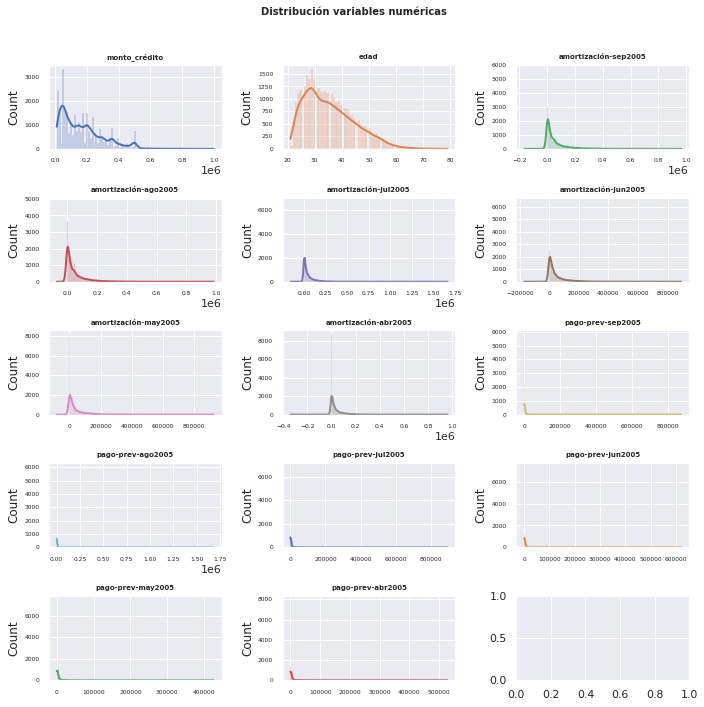

In [150]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = scaled_datos_num.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f811aca3dd0>,
      dtype=object)

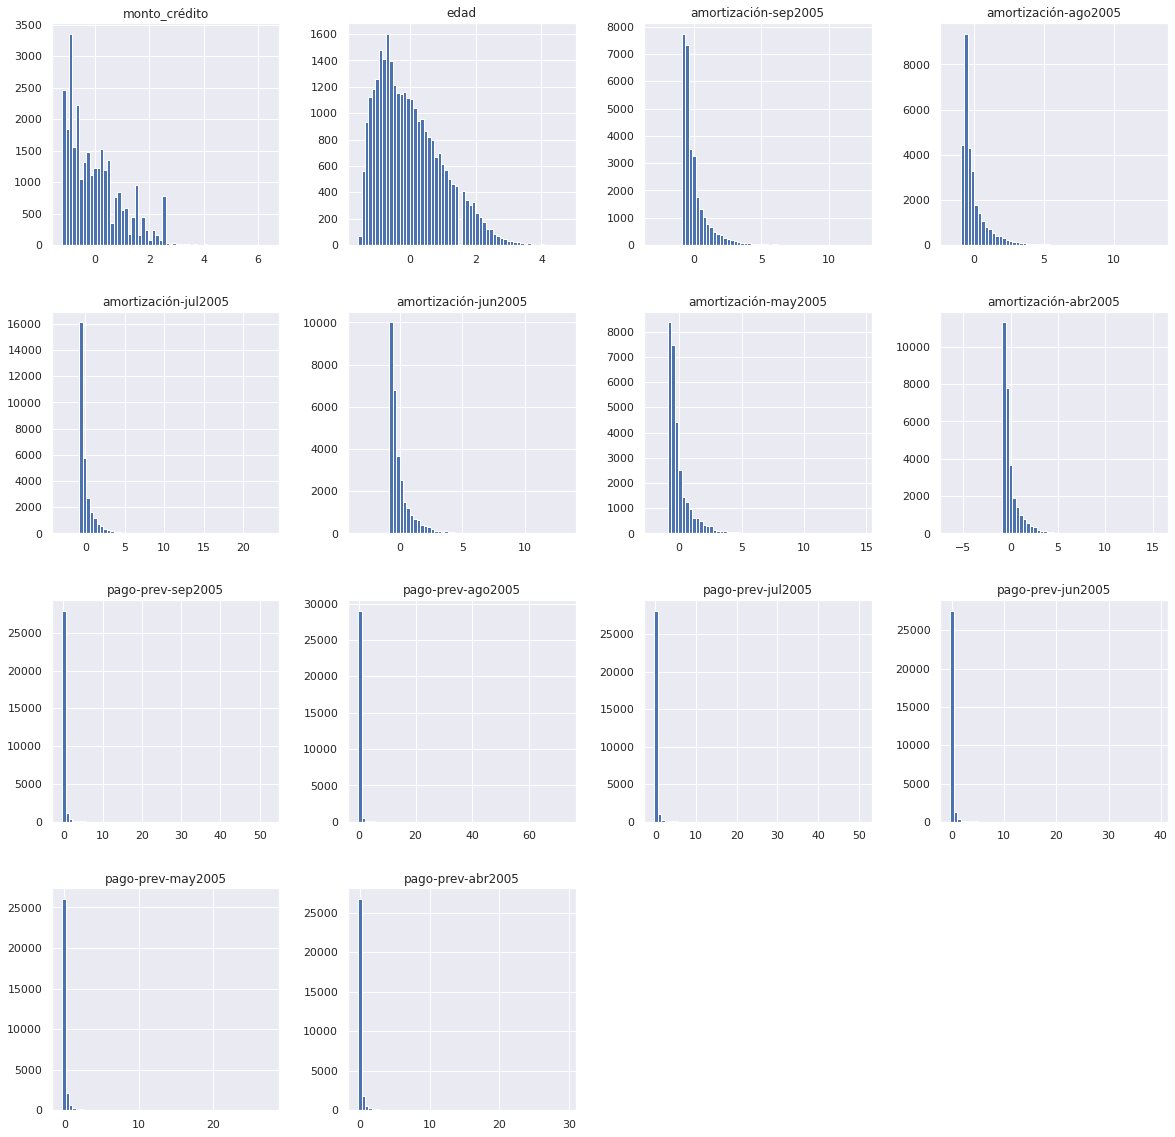

In [154]:
scaled_datos_num.hist(bins = 60, figsize=(20,20))

**Visualización**

Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

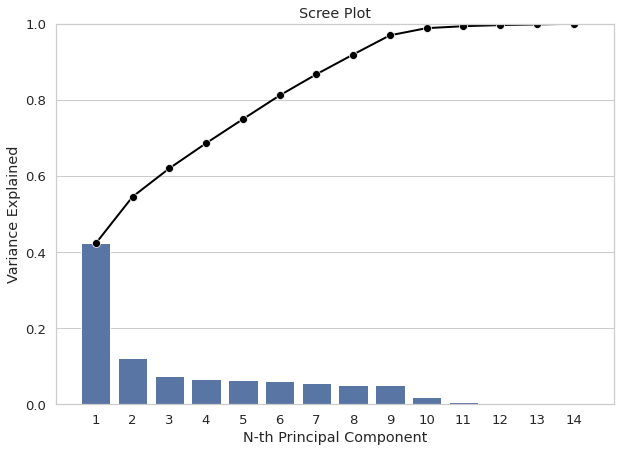

In [155]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


**Interpretación y explicación**

Luego de haber realizado el ejercicio, se pudo apreciar la ventaja de la reducción de dimensiones aunque se esperaba que fuese mejor se pasó de 24 columnas a 14. La gráfica scree a mi modo de verlo nos permite ver la relevancia de los datos de los principales componentes desde la varianza eplicada más alta a la más baja.